**Neural Networks Assignment**

Koukouletsou Aikaterini 10218

Electrical and Computer Engineering | AUTh

koukoulet@ece.auth.gr

**Data Import and Preprocessing**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
import seaborn as sns

# Load Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Reshape and Normalize Data
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32) 
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


# Name Classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

**Run this part ONLY if you want to apply PCA to the dataset**

In [52]:
pca = PCA(n_components = 50)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

**k Nearest Neighbours Classifier** | kΝΝ

**kNN (k = 3)**

Choose **Euclidean** or **Cosine Similarity** to calculate distance

kNN with k = 3 achieved an accuracy score of  0.3303 

              precision    recall  f1-score   support

    airplane       0.32      0.57      0.41      1000
  automobile       0.58      0.24      0.34      1000
        bird       0.20      0.45      0.28      1000
         cat       0.26      0.23      0.24      1000
        deer       0.25      0.44      0.32      1000
         dog       0.43      0.21      0.28      1000
        frog       0.36      0.23      0.28      1000
       horse       0.73      0.20      0.31      1000
        ship       0.44      0.61      0.51      1000
       truck       0.73      0.12      0.21      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



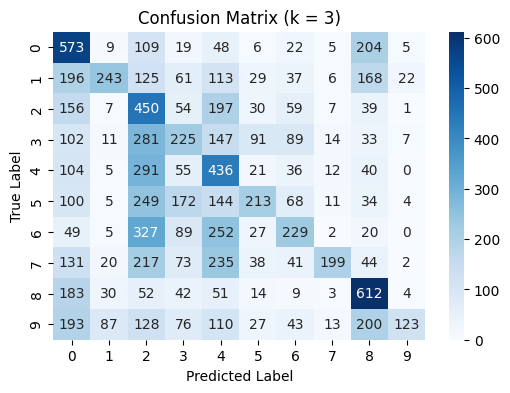

In [2]:
knn = KNeighborsClassifier(n_neighbors = 3) 

#           UNCOMMENT THIS LINE 
# if you want to use cosine distance !!!
# knn = KNeighborsClassifier(n_neighbors = 3, metric = 'cosine') 

knn.fit(x_train, y_train.ravel())
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("kNN with k = 3 achieved an accuracy score of ", accuracy, "\n")
print(classification_report(y_test, y_pred, target_names=class_names))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (k = 3)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**kNN (k = 1)**

Choose **Euclidean** or **Cosine Similarity** to calculate distance

kNN with k = 1 achieved an accuracy score of  0.3539 

              precision    recall  f1-score   support

    airplane       0.42      0.48      0.45      1000
  automobile       0.65      0.22      0.33      1000
        bird       0.24      0.38      0.30      1000
         cat       0.29      0.24      0.26      1000
        deer       0.25      0.46      0.32      1000
         dog       0.36      0.29      0.32      1000
        frog       0.33      0.35      0.34      1000
       horse       0.56      0.29      0.39      1000
        ship       0.40      0.62      0.49      1000
       truck       0.61      0.20      0.30      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.35     10000
weighted avg       0.41      0.35      0.35     10000



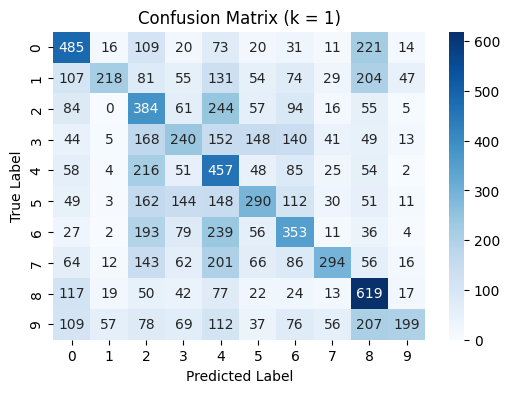

In [3]:
knn = KNeighborsClassifier(n_neighbors = 1)

#           UNCOMMENT THIS LINE 
# if you want to use cosine distance !!!
# knn = KNeighborsClassifier(n_neighbors = 1, metric = 'cosine') 

knn.fit(x_train, y_train.ravel())
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("kNN with k = 1 achieved an accuracy score of ", accuracy, "\n");
print(classification_report(y_test, y_pred, target_names=class_names));

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (k = 1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Nearest Centroid**

Nearest Centroid algorithm achieved an accuracy score of  0.2774 

              precision    recall  f1-score   support

    airplane       0.27      0.54      0.36      1000
  automobile       0.28      0.19      0.22      1000
        bird       0.28      0.11      0.16      1000
         cat       0.27      0.06      0.09      1000
        deer       0.28      0.12      0.17      1000
         dog       0.27      0.29      0.28      1000
        frog       0.22      0.54      0.31      1000
       horse       0.27      0.17      0.20      1000
        ship       0.42      0.37      0.39      1000
       truck       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



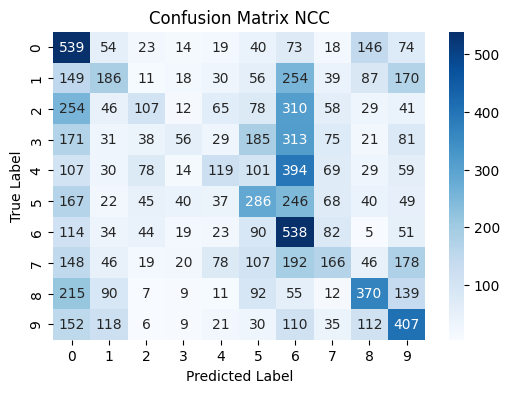

In [6]:
clf = NearestCentroid()

clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Nearest Centroid algorithm achieved an accuracy score of ", accuracy, "\n");
print(classification_report(y_test, y_pred, target_names=class_names))
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix NCC')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**Nearest Centroid Algorithm from scratch**

Nearest Centroid algorithm from scratch achieved an accuracy score of  0.2774 

              precision    recall  f1-score   support

    airplane       0.27      0.54      0.36      1000
  automobile       0.28      0.19      0.22      1000
        bird       0.28      0.11      0.16      1000
         cat       0.27      0.06      0.09      1000
        deer       0.28      0.12      0.17      1000
         dog       0.27      0.29      0.28      1000
        frog       0.22      0.54      0.31      1000
       horse       0.27      0.17      0.20      1000
        ship       0.42      0.37      0.39      1000
       truck       0.33      0.41      0.36      1000

    accuracy                           0.28     10000
   macro avg       0.29      0.28      0.25     10000
weighted avg       0.29      0.28      0.25     10000



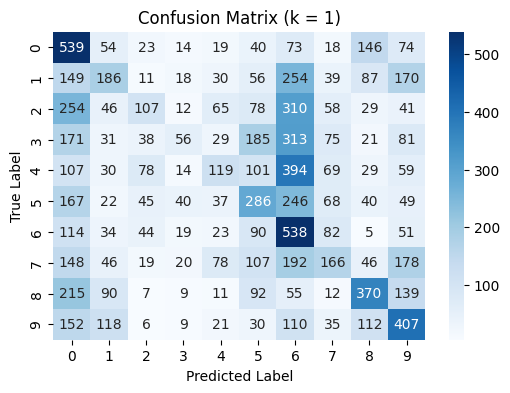

In [7]:
num_classes = 10
centroids = np.zeros((num_classes, x_train.shape[1]))

for c in range(num_classes):
    class_samples = x_train[y_train.ravel() == c]
    centroids[c] = class_samples.mean(axis=0)


def predict(sample, centroids):
    distances = np.linalg.norm(centroids - sample, axis=1)
    nearest_centroid_index = np.argmin(distances)
    return nearest_centroid_index

y_pred = [predict(sample, centroids) for sample in x_test]

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Nearest Centroid algorithm from scratch achieved an accuracy score of ", accuracy, "\n");
print(classification_report(y_test, y_pred, target_names=class_names))


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix (k = 1)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
